In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import pandas_profiling

https://github.com/mohan-aditya05/credit_card_customer_segmentation/blob/master/Credit%20Card-Segmentation.ipynb

In [139]:
data = pd.read_csv('F:\\Analytix\\Git\\Analytix\\Projects\\4. Segmentation of Credit Card Customers\\CC_GENERAL.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [141]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [142]:
profile_report = pandas_profiling.ProfileReport(data)
profile_report.to_file(outputfile='profile.html')

In [143]:
data.drop(columns=['CUST_ID'], axis=1, inplace=True)

In [144]:
def purchaseType(x):
    if x['ONEOFF_PURCHASES'] == 0 and x['INSTALLMENTS_PURCHASES'] == 0:
        return "None"
    elif x['ONEOFF_PURCHASES'] > 0 and x['INSTALLMENTS_PURCHASES'] == 0:
        return "One_Of"
    elif x['ONEOFF_PURCHASES'] == 0 and x['INSTALLMENTS_PURCHASES'] > 0:
        return "Installment_Purchases"
    elif x['ONEOFF_PURCHASES'] >0 and x['INSTALLMENTS_PURCHASES'] >0:
        return "Both"
    else:
        return -1

In [145]:
# Feature Engineering
data['Monthly_avg_purchase'] = data['PURCHASES'] / data['TENURE']
data['Monthly_cash_advance'] = data['CASH_ADVANCE'] / data['TENURE']
data['limit_usage'] = data['BALANCE'] / data['CREDIT_LIMIT']

arr = []
for row in data.iterrows():
    x = purchaseType(row[1])
    arr.append(x)
data['purchase_type'] = pd.Series(arr)

In [146]:
data.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
6   627.260806           1.000000    7091.01           6402.63   
7  1823.652743           1.000000     436.20              0.00   
8  1014.926473           1.000000     861.49            661.49   
9   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY          ...            PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000          ...                        2        1000.0   
1                0.250000          ...                        0        7000.0   
2                0.000000          ...                       12        7500.0   
3                0.083333          ...                        1        7500.0   
4                0.000000          ...                        1        1200.0   
5                0.000000          ...                        8        1800.0   
6                0.000000          ...                       64       13500.0   
7                0.000000          ...                       12        2300.0   
8                0.000000          ...                        5        7000.0   
9                0.000000          ...                        3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000               NaN          0.000000      12   
4   678.334763        244.791237          0.000000      12   
5  1400.057770       2407.246035          0.000000      12   
6  6354.314328        198.065894          1.000000      12   
7   679.065082        532.033990          0.000000      12   
8   688.278568        311.963409          0.000000      12   
9  1164.770591        100.302262          0.000000      12   

   Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0              7.950000              0.000000     0.040901   
1              0.000000            536.912124     0.457495   
2             64.430833              0.000000     0.332687   
3            1

In [147]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage']
['purchase_type']


In [148]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data[numeric_var_names].apply(lambda x: var_summary(x)).T
num_summary

N  NMISS           SUM         MEAN  \
BALANCE                           8950.0    0.0  1.400205e+07  1564.474828   
BALANCE_FREQUENCY                 8950.0    0.0  7.851573e+03     0.877271   
PURCHASES                         8950.0    0.0  8.978683e+06  1003.204834   
ONEOFF_PURCHASES                  8950.0    0.0  5.302314e+06   592.437371   
INSTALLMENTS_PURCHASES            8950.0    0.0  3.679055e+06   411.067645   
CASH_ADVANCE                      8950.0    0.0  8.760896e+06   978.871112   
PURCHASES_FREQUENCY               8950.0    0.0  4.388637e+03     0.490351   
ONEOFF_PURCHASES_FREQUENCY        8950.0    0.0  1.811996e+03     0.202458   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0    0.0  3.261714e+03     0.364437   
CASH_ADVANCE_FREQUENCY            8950.0    0.0  1.209541e+03     0.135144   
CASH_ADVANCE_TRX                  8950.0    0.0  2.907700e+04     3.248827   
PURCHASES_TRX                     8950.0    0.0  1.316530e+05    14.709832   
CREDIT_LIMIT                      8949.0    1.0  4.022083e+07  4494.449450   
PAYMENTS                          8950.0    0.0  1.551164e+07  1733.143852   
MINIMUM_PAYMENTS                  8637.0  313.0  7.464152e+06   864.206542   
PRC_FULL_PAYMENT                  8950.0    0.0  1.375746e+03     0.153715   
TENURE                            8950.0    0.0  1.030800e+05    11.517318   
Monthly_avg_purchase              8950.0    0.0  7.712678e+05    86.175173   
Monthly_cash_advance              8950.0    0.0  7.963530e+05    88.977984   
limit_usage                       8949.0    1.0  3.480502e+03     0.388926   

                                       MEDIAN          STD           VAR  \
BALANCE                            873.385231  2081.531879  4.332775e+06   
BALANCE_FREQUENCY                    1.000000     0.236904  5.612351e-02   
PURCHASES                          361.280000  2136.634782  4.565208e+06   
ONEOFF_PURCHASES                    38.000000  1659.887917  2.755228e+06   
INSTALLMENTS_PURCHASES              89.000000   904.338115  8.178274e+05   
CASH_ADVANCE                         0.000000  2097.163877  4.398096e+06   
PURCHASES_FREQUENCY                  0.500000     0.401371  1.610985e-01   
ONEOFF_PURCHASES_FREQUENCY           0.083333     0.298336  8.900441e-02   
PURCHASES_INSTALLMENTS_FREQUENCY     0.166667     0.397448  1.579647e-01   
CASH_ADVANCE_FREQUENCY               0.000000     0.200121  4.004857e-02   
CASH_ADVANCE_TRX                     0.000000     6.824647  4.657580e+01   
PURCHASES_TRX                        7.000000    24.857649  6.179027e+02   
CREDIT_LIMIT                      3000.000000  3638.815725  1.324098e+07   
PAYMENTS                           856.901546  2895.063757  8.381394e+06   
MINIMUM_PAYMENTS                   312.343947  2372.446607  5.628503e+06   
PRC_FULL_PAYMENT                     0.000000     0.292499  8.555578e-02   
TENURE                              12.000000     1.338331  1.791129e+00   
Monthly_avg_purchase                31.936667   180.508787  3.258342e+04   
Monthly_cash_advance                 0.000000   193.136115  3.730156e+04   
limit_usage                          0.302870     0.389722  1.518835e-01   

                                        MIN          P1           P5  \
BALANCE                            0.000000    0.065101     8.814518   
BALANCE_FREQUENCY                  0.000000    0.090909     0.272727   
PURCHASES                          0.000000    0.000000     0.000000   
ONEOFF_PURCHASES                   0.000000    0.000000     0.000000   
INSTALLMENTS_PURCHASES             0.000000    0.000000     0.000000   
CASH_ADVANCE                       0.000000    0.000000     0.000000   
PURCHASES_FREQUENCY                0.000000    0.000000     0.000000   
ONEOFF_PURCHASES_FREQUENCY         0.000000    0.000000     0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY   0.000000    0.000000     0.000000   
CASH_ADVANCE_FREQUENCY             0.000000    0.000000     0.000000   
CASH_ADVANC

In [149]:
data_num = data[numeric_var_names]
data_cat = data[cat_var_names]

In [150]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

In [151]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x
def Missing_imputation_cat(x):
    x = x.fillna(x.mode())
    return x

data_num = data_num.apply(lambda x: Missing_imputation(x))
data_cat = data_cat.apply(lambda x: Missing_imputation_cat(x))

In [152]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 20 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

In [153]:
data_num.corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.370254   0.124336   
BALANCE_FREQUENCY                 0.370254           1.000000   0.192937   
PURCHASES                         0.124336           0.192937   1.000000   
ONEOFF_PURCHASES                  0.138493           0.153188   0.865282   
INSTALLMENTS_PURCHASES            0.040367           0.170524   0.710001   
CASH_ADVANCE                      0.565401           0.116485  -0.137265   
PURCHASES_FREQUENCY              -0.102891           0.237081   0.589131   
ONEOFF_PURCHASES_FREQUENCY        0.070789           0.204411   0.658719   
PURCHASES_INSTALLMENTS_FREQUENCY -0.089514           0.184918   0.461632   
CASH_ADVANCE_FREQUENCY            0.489843           0.200011  -0.187429   
CASH_ADVANCE_TRX                  0.487851           0.178447  -0.149599   
PURCHASES_TRX                     0.086826           0.240389   0.802715   
CREDIT_LIMIT                      0.510543           0.105576   0.348476   
PAYMENTS                          0.347819           0.124358   0.515077   
MINIMUM_PAYMENTS                  0.774570           0.291212   0.110925   
PRC_FULL_PAYMENT                 -0.359881          -0.111917   0.215231   
TENURE                            0.075801           0.133089   0.121018   
Monthly_avg_purchase              0.118802           0.187511   0.994094   
Monthly_cash_advance              0.543382           0.103147  -0.143318   
limit_usage                       0.619571           0.456831  -0.113876   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.138493                0.040367   
BALANCE_FREQUENCY                         0.153188                0.170524   
PURCHASES                                 0.865282                0.710001   
ONEOFF_PURCHASES                          1.000000                0.319737   
INSTALLMENTS_PURCHASES                    0.319737                1.000000   
CASH_ADVANCE                             -0.092469               -0.147078   
PURCHASES_FREQUENCY                       0.394927                0.639240   
ONEOFF_PURCHASES_FREQUENCY                0.764991                0.251237   
PURCHASES_INSTALLMENTS_FREQUENCY          0.168362                0.729578   
CASH_ADVANCE_FREQUENCY                   -0.121483               -0.200741   
CASH_ADVANCE_TRX                         -0.096036               -0.162689   
PURCHASES_TRX                             0.638903                0.714152   
CREDIT_LIMIT                              0.336708                0.210151   
PAYMENTS                                  0.456999                0.338280   
MINIMUM_PAYMENTS                          0.064326                0.107588   
PRC_FULL_PAYMENT                          0.127898                0.238894   
TENURE                                    0.087760                0.116144   
Monthly_avg_purchase                      0.863161                0.702986   
Monthly_cash_advance                     -0.097293               -0.152415   
limit_usage                              -0.078613               -0.122431   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.565401            -0.102891   
BALANCE_FREQUENCY                     0.116485             0.237081   
PURCHASES                            -0.137265             0.589131   
ONEOFF_PURCHASES                     -0.092469             0.394927   
INSTALLMENTS_PURCHASES               -0.147078             0.639240   
CASH_ADVANCE                          1.000000            -0.286882   
PURCHASES_FREQUENCY                  -0.286882             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.122090             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.238361             0.862934   
CASH_ADVANCE_FREQUENCY                0.739399            -0.333006   
CASH_ADVANCE_TRX  

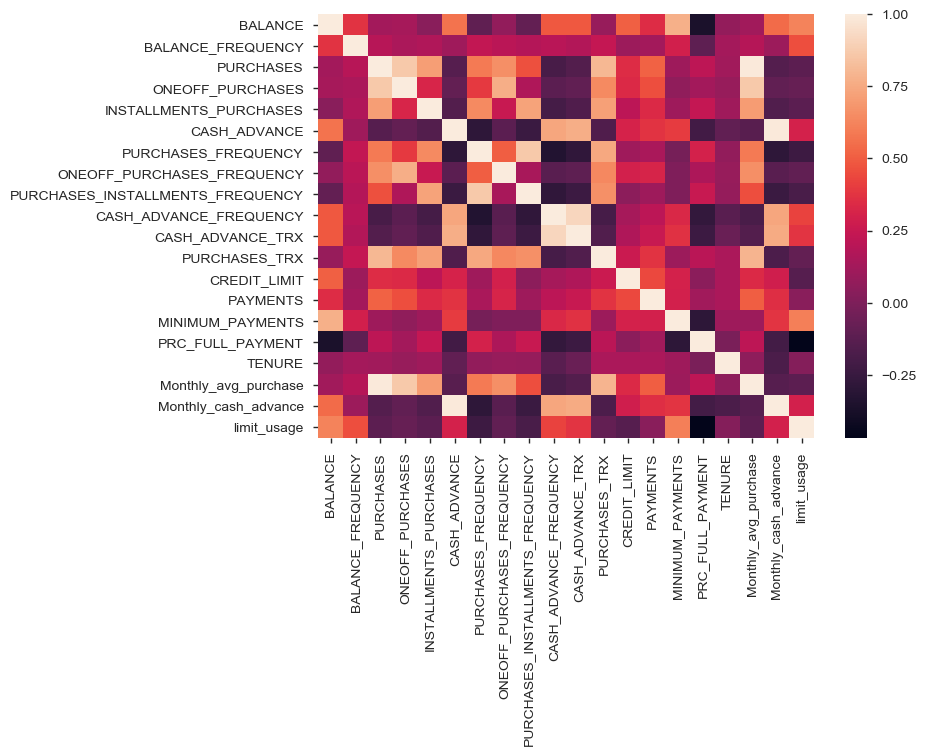

In [154]:
sns.heatmap(data_num.corr())
plt.show()

In [155]:
def createDummyVariables(df,col):
    df_dummy = pd.get_dummies(data=df[col],drop_first=True,prefix=col)
    df = pd.concat([df,df_dummy],axis=1)
    df.drop(col,axis=1,inplace=True)
    return df

In [156]:
data_cat_new = data_cat
for feature in data_cat_new.columns:
    data_cat_new = createDummyVariables(data_cat_new,feature)
data_cat_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 3 columns):
purchase_type_Installment_Purchases    8950 non-null uint8
purchase_type_None                     8950 non-null uint8
purchase_type_One_Of                   8950 non-null uint8
dtypes: uint8(3)
memory usage: 26.3 KB


In [157]:
data_final = pd.concat([data_num,data_cat_new], axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
BALANCE                                8950 non-null float64
BALANCE_FREQUENCY                      8950 non-null float64
PURCHASES                              8950 non-null float64
ONEOFF_PURCHASES                       8950 non-null float64
INSTALLMENTS_PURCHASES                 8950 non-null float64
CASH_ADVANCE                           8950 non-null float64
PURCHASES_FREQUENCY                    8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY             8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY       8950 non-null float64
CASH_ADVANCE_FREQUENCY                 8950 non-null float64
CASH_ADVANCE_TRX                       8950 non-null float64
PURCHASES_TRX                          8950 non-null float64
CREDIT_LIMIT                           8950 non-null float64
PAYMENTS                               8950 non-null float64
MINIMUM_PAYMENTS                       

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data_final)

In [160]:
data_scaled = pd.DataFrame(data_scaled,columns=[data_final.columns])
data_scaled.head()

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.835783         -0.297904 -0.662389        -0.600394   
1  1.036257          0.118296 -0.749136        -0.600394   
2  0.617437          0.534496 -0.046095         0.435900   
3  0.126875         -1.130304  0.613899         1.408742   
4 -0.375812          0.534496 -0.734587        -0.578948   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.483999    -0.605707           -0.806490   
1              -0.675642     2.838929           -1.221758   
2              -0.675642    -0.605707            1.269843   
3              -0.675642    -0.453170           -1.014125   
4              -0.675642    -0.605707           -1.014125   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.678661                        -0.707313   
1                  -0.678661                        -0.916995   
2                   2.673451                        -0.916995   
3                  -0.399319                        -0.916995   
4                  -0.399319                        -0.916995   

  CASH_ADVANCE_FREQUENCY         ...           PAYMENTS MINIMUM_PAYMENTS  \
0              -0.722502         ...          -0.800356        -0.686097   
1               0.692644         ...           1.643245         0.613947   
2              -0.722502         ...          -0.537116        -0.006307   
3              -0.250789         ...          -0.870392        -0.445226   
4              -0.722502         ...          -0.501872        -0.539371   

  PRC_FULL_PAYMENT    TENURE Monthly_avg_purchase Monthly_cash_advance  \
0        -0.525551  0.378995            -0.672440            -0.600126   
1         0.234227  0.378995            -0.757187             2.868023   
2        -0.525551  0.378995            -0.070357            -0.600126   
3        -0.525551  0.378995             0.574420            -0.460364   
4        -0.525551  0.378995            -0.742974            -0.600126   

  limit_usage purchase_type_Installment_Purchases purchase_type_None  \
0   -0.990006                            1.720516          -0.543690   
1    0.212144                           -0.581221           1.839282   
2   -0.148012                           -0.581221          -0.543690   
3   -0.466773                           -0.581221          -0.543690   
4    0.858340                           -0.581221          -0.543690   

  purchase_type_One_Of  
0            -0.514625  
1            -0.514625  
2             1.943162  
3             1.943162  
4             1.943162  

[5 rows x 23 columns]

Factor Analysis

In [161]:
from sklearn.decomposition import FactorAnalysis

In [162]:
fa = FactorAnalysis(random_state=123)
transformer = fa.fit(data_scaled)
transformer

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=None,
        noise_variance_init=None, random_state=123,
        svd_method='randomized', tol=0.01)

In [163]:
factor_df = pd.DataFrame(transformer.components_, columns=data_scaled.columns)
factor_df

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  -0.072980          0.165762  0.889372         0.729447   
1   0.764846          0.340140  0.281356         0.308206   
2   0.088749          0.149199 -0.145319        -0.436037   
3  -0.353070         -0.373287  0.023927         0.016049   
4   0.046335         -0.150474  0.100350        -0.022202   
5   0.197945         -0.184238 -0.036953        -0.030097   
6  -0.028989         -0.167128  0.076423         0.034805   
7   0.045902         -0.039024 -0.012701         0.017860   
8  -0.001125          0.086296 -0.000342         0.013055   
9  -0.000000          0.000000 -0.000000        -0.000000   
10  0.000000          0.000000  0.000000        -0.000000   
11 -0.000000          0.000000  0.000000         0.000000   
12 -0.000000          0.000000 -0.000000        -0.000000   
13 -0.000000         -0.000000  0.000000         0.000000   
14 -0.000000          0.000000  0.000000        -0.000000   
15 -0.000000          0.000000  0.000000         0.000000   
16 -0.000000          0.000000 -0.000000         0.000000   
17 -0.000000         -0.000000  0.000000         0.000000   
18  0.000000         -0.000000  0.000000        -0.000000   
19  0.000000         -0.000000  0.000000        -0.000000   
20  0.000000          0.000000  0.000000        -0.000000   
21  0.000000          0.000000  0.000000        -0.000000   
22  0.000000         -0.000000 -0.000000         0.000000   

   INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0                0.735785    -0.371763            0.788969   
1                0.105953     0.775709           -0.083206   
2                0.366044     0.142465            0.360214   
3                0.025500     0.263085            0.013900   
4                0.194755    -0.037800           -0.249908   
5               -0.045308     0.071052            0.017886   
6                0.065806     0.005129           -0.057471   
7               -0.037813     0.035628            0.028016   
8               -0.030601     0.009160            0.011326   
9                0.000000     0.000000            0.000000   
10               0.000000    -0.000000           -0.000000   
11              -0.000000     0.000000           -0.000000   
12              -0.000000    -0.000000            0.000000   
13              -0.000000     0.000000            0.000000   
14               0.000000     0.000000            0.000000   
15              -0.000000     0.000000           -0.000000   
16               0.000000     0.000000           -0.000000   
17              -0.000000     0.000000            0.000000   
18              -0.000000    -0.000000            0.000000   
19              -0.000000     0.000000            0.000000   
20              -0.000000     0.000000           -0.000000   
21              -0.000000    -0.000000            0.000000   
22               0.000000    -0.000000            0.000000   

   ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.653427                         0.662373   
1                    0.219001                        -0.108725   
2                   -0.397162                         0.608487   
3                    0.002030                         0.013365   
4                   -0.255692                        -0.049718   
5                   -0.035350                        -0.028695   
6                   -0.148316                        -0.025350   
7                    0.042561                         0.017614   
8                    0.009074                        -0.014006   
9                    0.000000                         0.000000   
10                  -0.000000                        -0.000000   
11                  -0.000000                         0.000000   
12                   0.000000                         0.000000   
13                  -0.000000                         0.000000   
14                   0.000000                        -0.00000

In [283]:
fa = FactorAnalysis(n_components=10,random_state=123)
transformer = fa.fit(data_scaled)
transformer

C:\Users\User\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
        noise_variance_init=None, random_state=123,
        svd_method='randomized', tol=0.01)

In [284]:
factor_df = pd.DataFrame(transformer.components_, columns=data_scaled.columns)
factor_df

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  0.006522          0.180631  0.966564         0.849209   
1  0.674185          0.232000  0.174220         0.196389   
2  0.024376         -0.025467  0.138649        -0.228811   
3 -0.427696         -0.347692  0.001592        -0.005129   
4  0.335137          0.235777  0.036247         0.079211   
5 -0.098188         -0.245932  0.117071         0.313260   
6  0.221203         -0.026713  0.011371         0.101837   
7 -0.328751          0.099687  0.014406         0.056812   
8  0.272306         -0.007361 -0.002381         0.012175   
9 -0.012442         -0.156166 -0.007411        -0.071099   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.695574    -0.310663            0.674483   
1               0.051557     0.940785           -0.114109   
2               0.567251     0.021709            0.102039   
3               0.016490     0.061527            0.103270   
4              -0.078160    -0.104944           -0.147645   
5              -0.370683    -0.004121           -0.504986   
6              -0.164809     0.018982            0.246956   
7              -0.078756    -0.001400            0.163959   
8              -0.014880    -0.040284            0.026218   
9               0.103902    -0.001296           -0.268730   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.764201                         0.494831   
1                   0.131599                        -0.125910   
2                  -0.612953                         0.469275   
3                   0.008037                         0.071142   
4                  -0.039836                        -0.144887   
5                  -0.135110                        -0.525321   
6                  -0.036079                         0.177758   
7                  -0.015854                         0.145974   
8                  -0.006202                         0.044009   
9                  -0.000256                        -0.386479   

  CASH_ADVANCE_FREQUENCY         ...           PAYMENTS MINIMUM_PAYMENTS  \
0              -0.321718         ...           0.414491         0.016944   
1               0.722813         ...           0.525417         0.489578   
2              -0.043985         ...           0.093867         0.117711   
3              -0.049485         ...          -0.060797        -0.437317   
4               0.146867         ...          -0.116781         0.318792   
5              -0.018151         ...           0.131213        -0.147809   
6              -0.272130         ...          -0.027663         0.205865   
7               0.336906         ...          -0.063465        -0.187469   
8               0.385295         ...           0.005500         0.095660   
9               0.035676         ...           0.008439         0.019393   

  PRC_FULL_PAYMENT    TENURE Monthly_avg_purchase Monthly_cash_advance  \
0         0.260813  0.144867             0.960818            -0.315518   
1        -0.190472 -0.067786             0.176116             0.930517   
2         0.055677  0.032433             0.134004             0.016872   
3         0.291320 -0.792256             0.050976             0.127729   
4        -0.286327 -0.575280             0.074996            -0.054462   
5        -0.009412  0.086448             0.109710            -0.012850   
6        -0.064190 -0.022561             0.019951             0.012310   
7        -0.002077  0.035928             0.017164             0.003578   
8        -0.004358 -0.003778            -0.002973            -0.044583   
9        -0.052786 -0.003118            -0.001563             0.000399   

  limit_usage purchase_type_Installment_Purchases purchase_type_None  \
0   -0.186951                           -0.149065          -0.498344   
1    0.361964                           -0.302738           0.243200   
2   -0.012140                            0.436929          -0.000943   
3   -0.571111  

In [285]:
# plt.figure(figsize=(10,8))
# factor_df.loc[0].plot(kind="bar")
# plt.grid(True)

factor_df.loc[0].sort_values(ascending=False).head(10)

PURCHASES                           0.966564
Monthly_avg_purchase                0.960818
ONEOFF_PURCHASES                    0.849209
PURCHASES_TRX                       0.834578
ONEOFF_PURCHASES_FREQUENCY          0.764201
INSTALLMENTS_PURCHASES              0.695574
PURCHASES_FREQUENCY                 0.674483
PURCHASES_INSTALLMENTS_FREQUENCY    0.494831
PAYMENTS                            0.414491
CREDIT_LIMIT                        0.295987
Name: 0, dtype: float64

In [286]:
factor_df.loc[1].sort_values(ascending=False).head(10)

CASH_ADVANCE              0.940785
Monthly_cash_advance      0.930517
CASH_ADVANCE_TRX          0.747577
CASH_ADVANCE_FREQUENCY    0.722813
BALANCE                   0.674185
PAYMENTS                  0.525417
MINIMUM_PAYMENTS          0.489578
CREDIT_LIMIT              0.419540
limit_usage               0.361964
purchase_type_None        0.243200
Name: 1, dtype: float64

In [287]:
factor_df.loc[2].sort_values(ascending=False).head(10)

INSTALLMENTS_PURCHASES                 0.567251
PURCHASES_INSTALLMENTS_FREQUENCY       0.469275
purchase_type_Installment_Purchases    0.436929
PURCHASES                              0.138649
Monthly_avg_purchase                   0.134004
MINIMUM_PAYMENTS                       0.117711
PURCHASES_FREQUENCY                    0.102039
PAYMENTS                               0.093867
PURCHASES_TRX                          0.081941
PRC_FULL_PAYMENT                       0.055677
Name: 2, dtype: float64

In [288]:
factor_df.loc[3].sort_values(ascending=False).head(10)

PRC_FULL_PAYMENT                       0.291320
Monthly_cash_advance                   0.127729
purchase_type_Installment_Purchases    0.116933
PURCHASES_FREQUENCY                    0.103270
PURCHASES_INSTALLMENTS_FREQUENCY       0.071142
CASH_ADVANCE                           0.061527
Monthly_avg_purchase                   0.050976
INSTALLMENTS_PURCHASES                 0.016490
ONEOFF_PURCHASES_FREQUENCY             0.008037
purchase_type_One_Of                   0.005075
Name: 3, dtype: float64

In [289]:
factor_df.loc[4].sort_values(ascending=False).head(10)

limit_usage               0.646145
BALANCE                   0.335137
MINIMUM_PAYMENTS          0.318792
BALANCE_FREQUENCY         0.235777
purchase_type_None        0.183788
CASH_ADVANCE_FREQUENCY    0.146867
ONEOFF_PURCHASES          0.079211
Monthly_avg_purchase      0.074996
CASH_ADVANCE_TRX          0.054280
PURCHASES                 0.036247
Name: 4, dtype: float64

In [290]:
factor_df.loc[5].sort_values(ascending=False).head(5)

ONEOFF_PURCHASES        0.313260
purchase_type_None      0.292187
purchase_type_One_Of    0.224223
PAYMENTS                0.131213
PURCHASES               0.117071
Name: 5, dtype: float64

In [291]:
factor_df.loc[6].sort_values(ascending=False).head(5)

purchase_type_Installment_Purchases    0.316090
purchase_type_One_Of                   0.274275
PURCHASES_FREQUENCY                    0.246956
BALANCE                                0.221203
MINIMUM_PAYMENTS                       0.205865
Name: 6, dtype: float64

In [292]:
factor_df.loc[7].sort_values(ascending=False).head(5)

CASH_ADVANCE_FREQUENCY              0.336906
CASH_ADVANCE_TRX                    0.299471
PURCHASES_FREQUENCY                 0.163959
PURCHASES_INSTALLMENTS_FREQUENCY    0.145974
limit_usage                         0.137102
Name: 7, dtype: float64

In [293]:
factor_df.loc[8].sort_values(ascending=False).head(5)

CASH_ADVANCE_FREQUENCY    0.385295
CREDIT_LIMIT              0.362399
CASH_ADVANCE_TRX          0.301399
BALANCE                   0.272306
MINIMUM_PAYMENTS          0.095660
Name: 8, dtype: float64

In [294]:
factor_df.loc[9].sort_values(ascending=False).head(5)

purchase_type_One_Of      0.518740
INSTALLMENTS_PURCHASES    0.103902
CASH_ADVANCE_TRX          0.039183
CASH_ADVANCE_FREQUENCY    0.035676
MINIMUM_PAYMENTS          0.019393
Name: 9, dtype: float64

In [331]:
final_vars = ['PURCHASES',
             'Monthly_avg_purchase',
             'CASH_ADVANCE',
             'Monthly_cash_advance',
             'INSTALLMENTS_PURCHASES',
             'limit_usage',
             'ONEOFF_PURCHASES',
             'purchase_type_Installment_Purchases',
             'CASH_ADVANCE_FREQUENCY',
             'purchase_type_One_Of',
             'ONEOFF_PURCHASES',
             'PURCHASES_TRX'
             ];

# final_vars = ['PURCHASES',
#              'Monthly_avg_purchase',
#              'ONEOFF_PURCHASES',
#              'PURCHASES_TRX',
#              'ONEOFF_PURCHASES_FREQUENCY',
#              'CASH_ADVANCE',
#              'Monthly_cash_advance',
#              'CASH_ADVANCE_TRX',
#              'CASH_ADVANCE_FREQUENCY',
#              'INSTALLMENTS_PURCHASES',
#              'PURCHASES_INSTALLMENTS_FREQUENCY',
#              'purchase_type_Installment_Purchases',
#              'PRC_FULL_PAYMENT',
#              'limit_usage',
#               'BALANCE',
#               'MINIMUM_PAYMENTS',
#               'CASH_ADVANCE_FREQUENCY',
#               'CREDIT_LIMIT',
#               'purchase_type_One_Of'
#              ]

# final_vars = ['PURCHASES','ONEOFF_PURCHASES','PURCHASES_TRX','ONEOFF_PURCHASES_FREQUENCY','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CREDIT_LIMIT','PAYMENTS','CASH_ADVANCE_FREQUENCY']

final_vars = list(set(final_vars))

In [332]:
data_model = data_scaled[final_vars]
data_model.head()

limit_usage PURCHASES_TRX Monthly_cash_advance  \
0   -0.990006     -0.680426            -0.600126   
1    0.212144     -0.807798             2.868023   
2   -0.148012     -0.043563            -0.600126   
3   -0.466773     -0.744112            -0.460364   
4    0.858340     -0.744112            -0.600126   

  purchase_type_Installment_Purchases CASH_ADVANCE CASH_ADVANCE_FREQUENCY  \
0                            1.720516    -0.605707              -0.722502   
1                           -0.581221     2.838929               0.692644   
2                           -0.581221    -0.605707              -0.722502   
3                           -0.581221    -0.453170              -0.250789   
4                           -0.581221    -0.605707              -0.722502   

  Monthly_avg_purchase purchase_type_One_Of PURCHASES ONEOFF_PURCHASES  \
0            -0.672440            -0.514625 -0.662389        -0.600394   
1            -0.757187            -0.514625 -0.749136        -0.600394   
2            -0.070357             1.943162 -0.046095         0.435900   
3             0.574420             1.943162  0.613899         1.408742   
4            -0.742974             1.943162 -0.734587        -0.578948   

  INSTALLMENTS_PURCHASES  
0              -0.483999  
1              -0.675642  
2              -0.675642  
3              -0.675642  
4              -0.675642

K Means Clustering Analysis

In [337]:
from sklearn.cluster import KMeans

In [338]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3.fit(data_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [339]:
km_3.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [340]:
km_3.cluster_centers_

array([[-0.18398431, -0.2671516 , -0.46511937,  0.25758741, -0.46671888,
        -0.42096295, -0.34748053,  0.0883824 , -0.34922642, -0.31449066,
        -0.22078012],
       [ 0.6335856 , -0.519586  ,  1.47908154, -0.36485751,  1.47474163,
         1.39601547, -0.49370131, -0.03781423, -0.50091431, -0.37573423,
        -0.46583716],
       [-0.17643036,  1.63178324, -0.2851741 , -0.4378339 , -0.27379236,
        -0.33331604,  1.88359639, -0.26481709,  1.89926687,  1.61152805,
         1.39633211]])

In [341]:
km_4=KMeans(n_clusters=4,random_state=123).fit(data_model)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(data_model)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(data_model)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(data_model)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(data_model)
#km_5.labels_

In [342]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
data_final['cluster_3'] = km_3.labels_
data_final['cluster_4'] = km_4.labels_
data_final['cluster_5'] = km_5.labels_
data_final['cluster_6'] = km_6.labels_
data_final['cluster_7'] = km_7.labels_
data_final['cluster_8'] = km_8.labels_

In [343]:
data_final.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   4647.169122             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY    ...      limit_usage  \
0                0.000000    ...         0.040901   
1                0.250000    ...         0.457495   
2                0.000000    ...         0.332687   
3                0.083333    ...         0.222223   
4                0.000000    ...         0.681429   

   purchase_type_Installment_Purchases  purchase_type_None  \
0                                    1                   0   
1                                    0                   1   
2                                    0                   0   
3                                    0                   0   
4                                    0                   0   

   purchase_type_One_Of  cluster_3  cluster_4  cluster_5  cluster_6  \
0                     0          0          2          3          1   
1                     0          1          3          2          0   
2                     1          0          1          0          2   
3                     1          0          1          0          2   
4                     1          0          1          0          2   

   cluster_7  cluster_8  
0          3          2  
1          2          4  
2          1          7  
3          1          7  
4          1          7  

[5 rows x 29 columns]

Metrics

SC score

In [252]:
from sklearn import metrics

In [333]:
# calculate SC for K=3 through K=8
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(data_model)
    scores.append(metrics.silhouette_score(data_model, km.labels_))

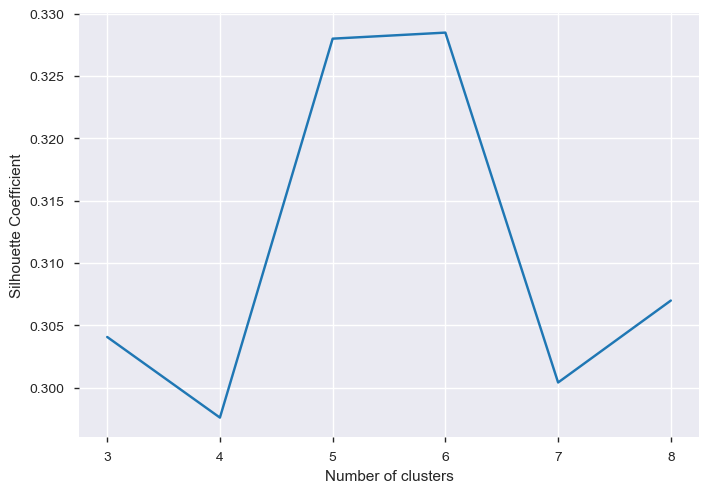

In [334]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [335]:
inertia = []
K = range(3,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_model)
    inertia.append(kmeanModel.inertia_)

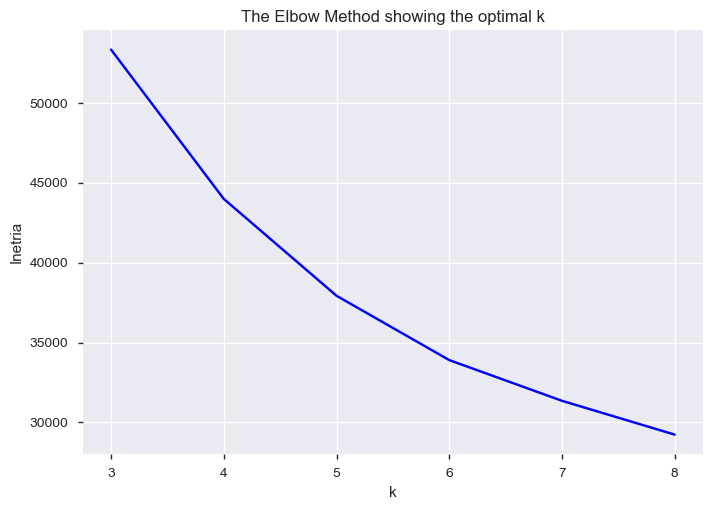

In [336]:
# Plot the elbow
plt.plot(K, inertia,'bx-')
plt.xlabel('k')
plt.ylabel('Inetria')
plt.title('The Elbow Method showing the optimal k')
plt.show()

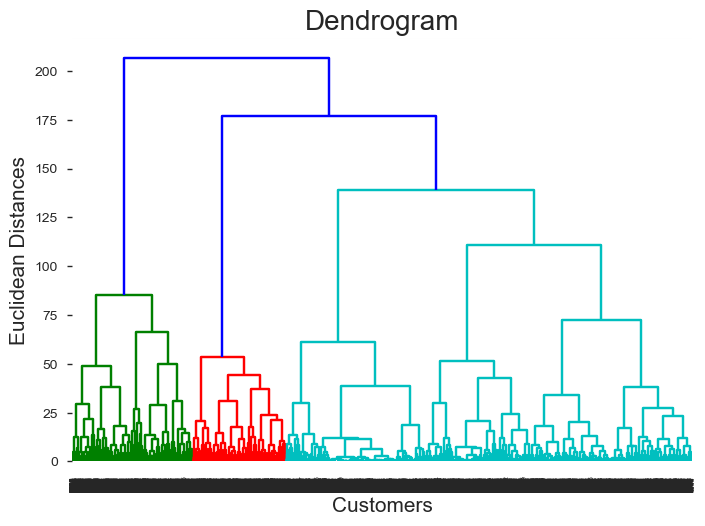

In [301]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as hcd
dendrogram = hcd.dendrogram(hcd.linkage(data_model[final_vars], metric='euclidean', method = 'ward'))
plt.title('Dendrogram', size=20)
plt.xlabel('Customers', size=15)
plt.xticks(rotation=90)
plt.ylabel('Euclidean Distances', size=15)
plt.show()

PROFILING

In [344]:
data_final.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   4647.169122             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY    ...      limit_usage  \
0                0.000000    ...         0.040901   
1                0.250000    ...         0.457495   
2                0.000000    ...         0.332687   
3                0.083333    ...         0.222223   
4                0.000000    ...         0.681429   

   purchase_type_Installment_Purchases  purchase_type_None  \
0                                    1                   0   
1                                    0                   1   
2                                    0                   0   
3                                    0                   0   
4                                    0                   0   

   purchase_type_One_Of  cluster_3  cluster_4  cluster_5  cluster_6  \
0                     0          0          2          3          1   
1                     0          1          3          2          0   
2                     1          0          1          0          2   
3                     1          0          1          0          2   
4                     1          0          1          0          2   

   cluster_7  cluster_8  
0          3          2  
1          2          4  
2          1          7  
3          1          7  
4          1          7  

[5 rows x 29 columns]

In [346]:
pd.Series.sort_index(data_final.cluster_5.value_counts())

0    1490
1    2563
2    1434
3    2053
4    1410
Name: cluster_5, dtype: int64